<a href="https://colab.research.google.com/github/ashwinidverma/AD-Classifier-/blob/main/ADANI_AD_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
#import shap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#import lime
#from lime import lime_tabular
#shap.initjs()

In [31]:
# prompt: lode data.xlsx

import pandas as pd

# Load the data from the Excel file
df = pd.read_excel('/content/drive/MyDrive/Socital_403_2024/ML_Model/Final_Data/ADANI_final_Genotype.xlsx')

# Print the DataFrame


In [32]:
df.columns

Index(['RID', 'PTID', 'AGE', 'Sex', 'EDU', 'APOE4', 'MMSE', 'WholeBrain',
       'ICV', 'TARGET1', 'TARGET', '(Amyloid)BETA', 'TAU', '(Ph4)TAU'],
      dtype='object')

In [33]:
df =df[['AGE', 'Sex', 'EDU', 'APOE4', 'MMSE', 'TARGET']]

In [34]:
df=df.dropna()


In [35]:
df['TARGET'].value_counts()

,count
TARGET,
1,690
0,298
2,223


In [36]:
# prompt: train a randomforest classifier usinf M/F,Hand,Age,Educ,SES,MMSE of df as feature and CDR as traget

from sklearn.ensemble import RandomForestClassifier
df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1})
df['TARGET'] = df['TARGET'].replace({0: 0, 1 : 1,2:2})

<ipython-input-36-aa714a7e7df1>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1})


array([[<Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'EDU'}>,
        <Axes: title={'center': 'MMSE'}>],
       [<Axes: title={'center': 'APOE4'}>,
        <Axes: title={'center': 'TARGET'}>]], dtype=object)

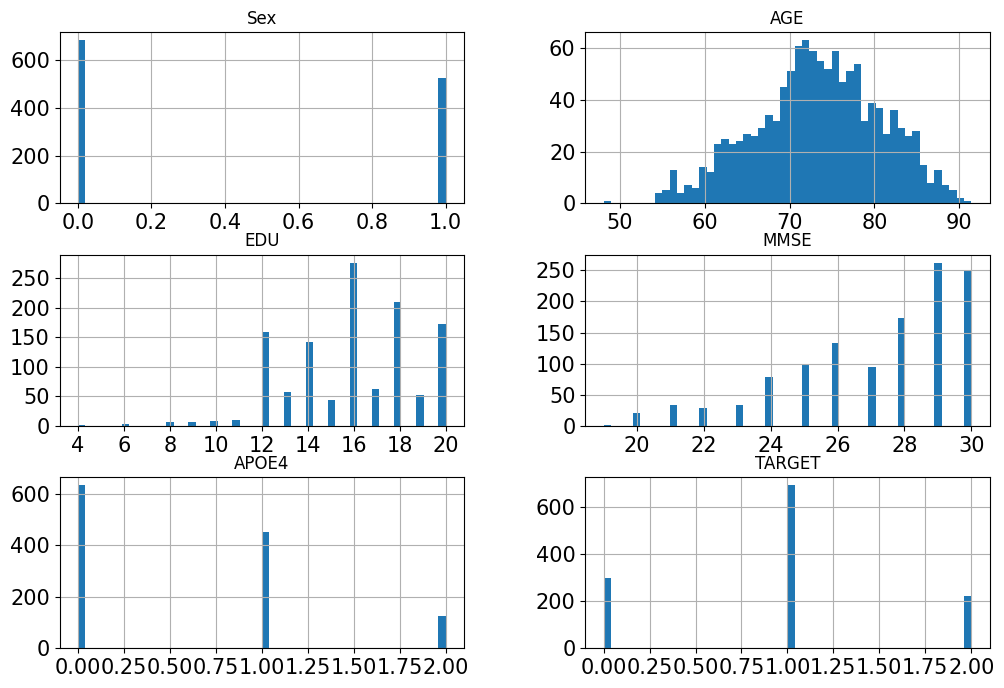

In [37]:
df[[ 'Sex','AGE', 'EDU', 'MMSE','APOE4',  'TARGET']].hist(figsize=(12, 8), bins=50, xlabelsize=15, ylabelsize=15)

In [38]:
df['TARGET'].value_counts()

,count
TARGET,
1,690
0,298
2,223


In [39]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Load and Preprocess Data
# Using Iris dataset as an example

features = ['AGE', 'Sex', 'EDU', 'APOE4']
target = 'TARGET'

X = df[features]
y = df[target]
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
cor = df[['AGE', 'Sex', 'EDU', 'APOE4', 'MMSE', 'TARGET']]

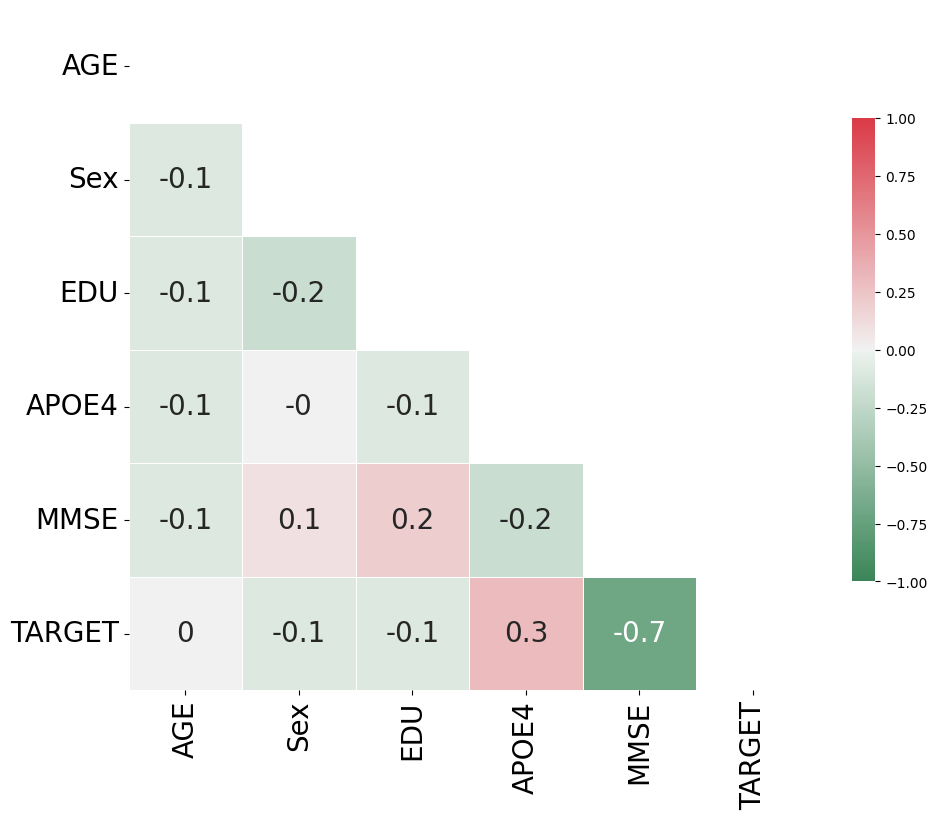

In [41]:
cor.corr()
f, ax = plt.subplots(figsize=(10,10))
corr=cor.corr().round(1)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidth = 0.5, cbar_kws={"shrink":0.5}, annot=True,annot_kws={"size": 20})
plt.yticks(fontsize=20, rotation=0)
plt.xticks(fontsize=20,rotation=90)
plt.tight_layout()

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.50      0.46        58
           1       0.59      0.46      0.52       147
           2       0.18      0.29      0.22        38

    accuracy                           0.44       243
   macro avg       0.40      0.42      0.40       243
weighted avg       0.49      0.44      0.46       243

Confusion Matrix:
[[29 23  6]
 [35 67 45]
 [ 4 23 11]]
Accuracy: 0.4403292181069959
Feature Importances: [0.5726538  0.04499905 0.20144278 0.18090437]


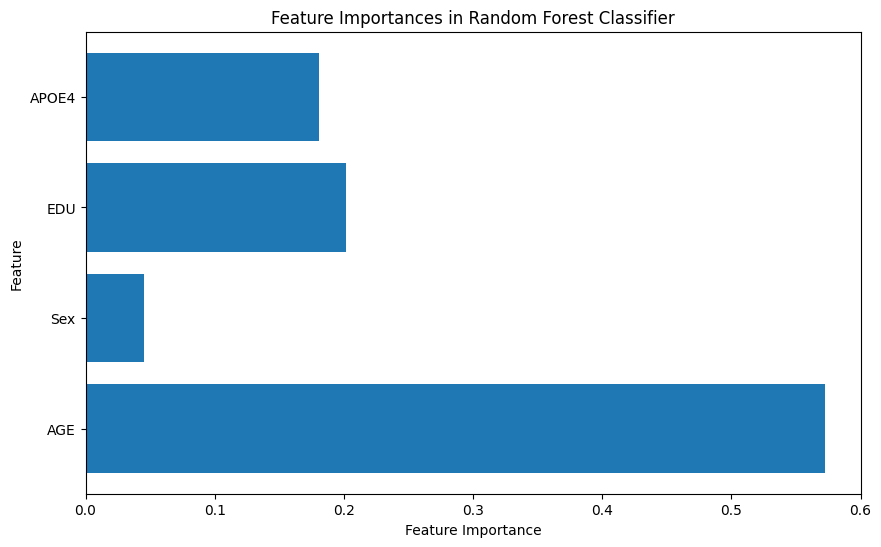

In [42]:

# 2. Train the Model
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10,
                            min_samples_split=10, class_weight='balanced',random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# 3. Make Predictions
# Predict on the test data
y_pred = clf.predict(X_test)

# 4. Evaluate the Model
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 5. Feature Importances (Optional)
# Print feature importances
feature_importances = clf.feature_importances_
print("Feature Importances:", feature_importances)

# Plot feature importances (Optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.xlim(0,0.6)
plt.title('Feature Importances in Random Forest Classifier')
plt.show()

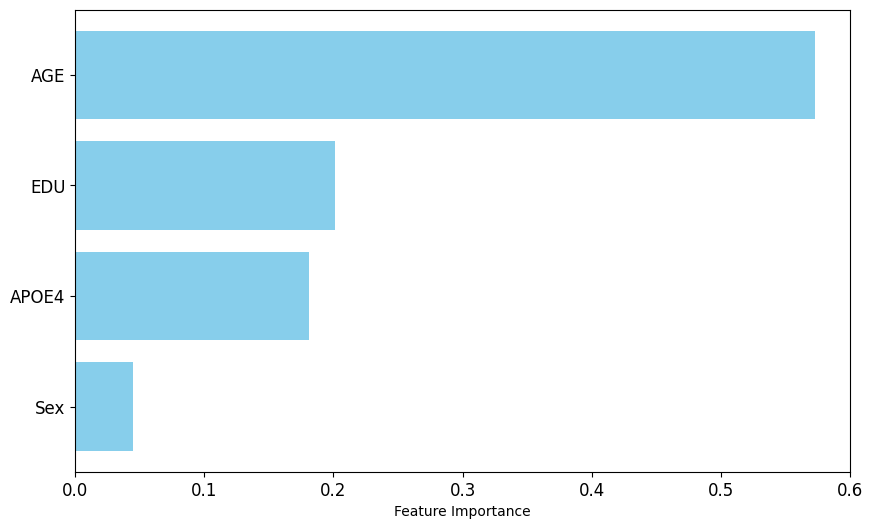

In [43]:
# Get feature importances and sort them
importances = clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]  # Sort in descending order

# Create a DataFrame for better visualization
sorted_features = pd.DataFrame({
    'Feature': np.array(X_train.columns)[sorted_indices],
    'Importance': importances[sorted_indices]
})

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features['Feature'], sorted_features['Importance'], color="skyblue")
plt.xlabel("Feature Importance")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 0.6)
#plt.title("Feature Importance (Sorted)")
plt.gca().invert_yaxis()  # To have the highest importance at the top
plt.show()

In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Load and Preprocess Data
# Using Iris dataset as an example

features = ['Sex', 'Age', 'MMSE', 'CSF_Amyloid',
       'CSF_Total_tau', 'CSF_Phosphorylated tau','diff']
target = 'Target'

X = df[features]
y = df[target]
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: "['Age', 'CSF_Amyloid', 'CSF_Total_tau', 'CSF_Phosphorylated tau', 'diff'] not in index"

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56        41
           1       0.87      0.87      0.87       138

    accuracy                           0.80       179
   macro avg       0.72      0.72      0.72       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
[[ 23  18]
 [ 18 120]]
Accuracy: 0.7988826815642458
Feature Importances: [0.39451314 0.03421719 0.15580051 0.08799722 0.32747194]


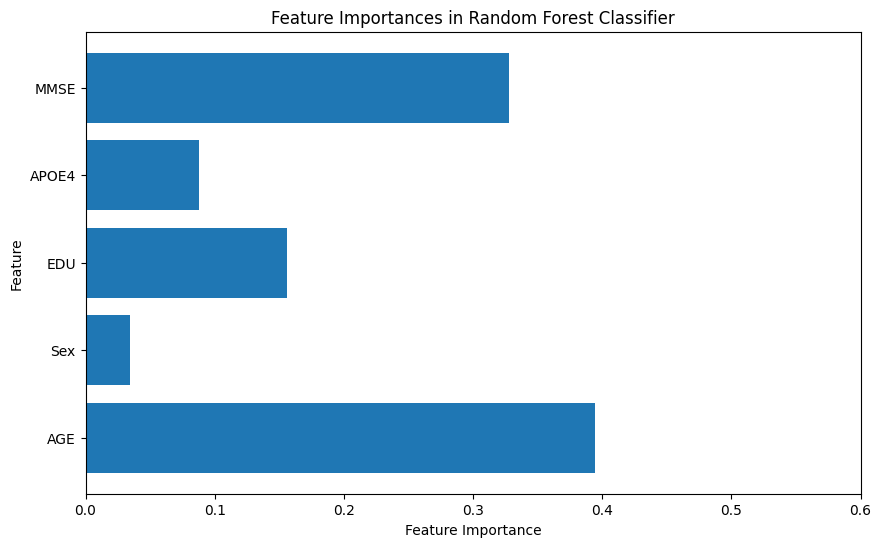

In [ ]:


# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
# 2. Train the Model
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=200, max_depth=10,
                            min_samples_split=6, random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# 3. Make Predictions
# Predict on the test data
y_pred = clf.predict(X_test)

# 4. Evaluate the Model
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 5. Feature Importances (Optional)
# Print feature importances
feature_importances = clf.feature_importances_
print("Feature Importances:", feature_importances)

# Plot feature importances (Optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.xlim(0,0.6)
plt.title('Feature Importances in Random Forest Classifier')
plt.show()

In [ ]:
features = ['M/F',  'AGE', 'MMSE']
target = 'Target'

X = df[features]
y = df[target]
# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
def check_scores(model, X_train, X_test ):
  # Making predictions on train and test data

  train_class_preds = model.predict(X_train)
  test_class_preds = model.predict(X_test)


  # Get the probabilities on train and test
  train_preds = model.predict_proba(X_train)[:,1]
  test_preds = model.predict_proba(X_test)[:,1]


  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(Y_train,train_class_preds)
  test_accuracy = accuracy_score(Y_test,test_class_preds)

  print("The accuracy on train dataset is", train_accuracy)
  print("The accuracy on test dataset is", test_accuracy)
  print()
  # Get the confusion matrices for train and test
  train_cm = confusion_matrix(Y_train,train_class_preds)
  test_cm = confusion_matrix(Y_test,test_class_preds )

  print('Train confusion matrix:')
  print( train_cm)
  print()
  print('Test confusion matrix:')
  print(test_cm)
  print()

  # Get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(Y_train,train_preds)
  test_auc = roc_auc_score(Y_test,test_preds)

  print('ROC on train data:', train_auc)
  print('ROC on test data:', test_auc)

  # Fscore, precision and recall on test data
  f1 = f1_score(Y_test, test_class_preds)
  precision = precision_score(Y_test, test_class_preds)
  recall = recall_score(Y_test, test_class_preds)


  #R2 score on train and test data
  train_log = log_loss(Y_train,train_preds)
  test_log = log_loss(Y_test, test_preds)

  print()
  print('Train log loss:', train_log)
  print('Test log loss:', test_log)
  print()
  print("F score is:",f1 )
  print("Precision is:",precision)
  print("Recall is:", recall)
  return model, train_auc, test_auc, train_accuracy, test_accuracy,f1, precision,recall, train_log, test_log


def check_importance(model, X_train):
  #Checking importance of features
  importances = model.feature_importances_

  #List of columns and their importances
  importance_dict = {'Feature' : list(X_train.columns),
                    'Feature Importance' : importances}
  #Creating a dataframe
  importance_df = pd.DataFrame(importance_dict)

  #Rounding it off to 2 digits as we might get exponential numbers
  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  return importance_df.sort_values(by=['Feature Importance'],ascending=False)

def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  pprint( grid.best_params_)

  return optimal_model



# This function will show how a feature is pushing towards 0 or 1
def interpret_with_lime(model, X_test):
  # New data
  interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification')


  exp = interpretor.explain_instance(
      data_row=X_test.iloc[10],
      predict_fn=model.predict_proba
  )

  exp.show_in_notebook(show_table=True)

# This gives feature importance
def plot_feature_importance(model, X_train):
  # PLotting features vs their importance factors
  fig = plt.figure(figsize = (15, 8))

  # Extracting importance values
  values =check_importance(model, X_train)[check_importance(model, X_train)['Feature Importance']>0]['Feature Importance'].values


  # Extracting importance features
  features = check_importance(model, X_train)[check_importance(model, X_train)['Feature Importance']>0]['Feature'].values

  plt.bar(features, values, color ='blue',
          width = 0.4)
  plt.xticks( rotation='vertical')
  plt.show()

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
rf_parameters = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

pprint(rf_parameters)

#finding the best model
rf_optimal_model = grid_search(RandomForestClassifier(), rf_parameters, X_train, y_train)


{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}
Fitting 2 folds for each of 54 candidates, totalling 108 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.1s


In [ ]:
rf_model, rf_train_auc, rf_test_auc, rf_train_accuracy, rf_test_accuracy,rf_f1, rf_precision,rf_recall,rf_train_log, rf_test_log = check_scores(rf_optimal_model, X_train, X_test )

The accuracy on train dataset is 0.870242214532872
The accuracy on test dataset is 0.8413793103448276

Train confusion matrix:
[[871  38]
 [112 135]]

Test confusion matrix:
[[219  10]
 [ 36  25]]

ROC on train data: 0.9206562356640522
ROC on test data: 0.9195719092275754

Train log loss: 0.31909948532769866
Test log loss: 0.3264833368487788

F score is: 0.5208333333333334
Precision is: 0.7142857142857143
Recall is: 0.4098360655737705


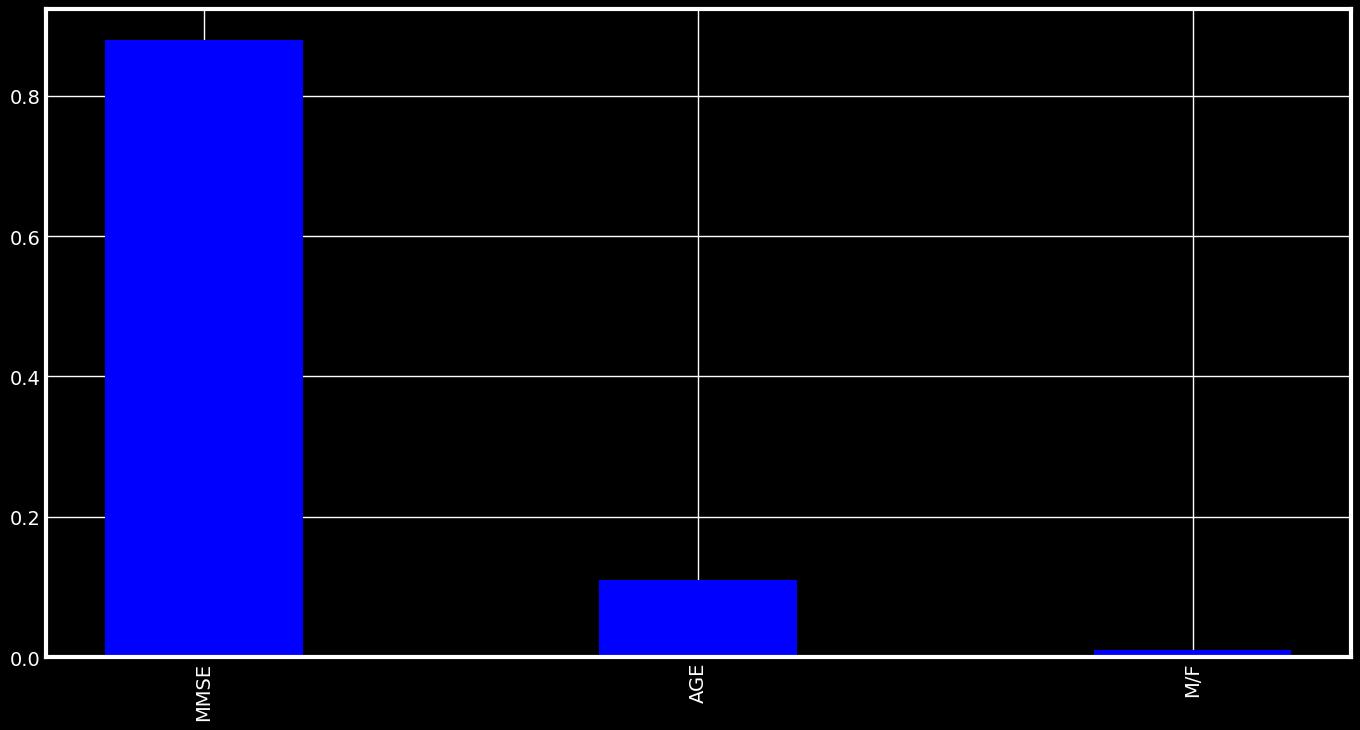

In [ ]:
plot_feature_importance(rf_optimal_model, X_train)

In [ ]:
interpret_with_lime(rf_optimal_model, X_test)

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report



# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Only for 'rbf', 'poly', 'sigmoid' kernels
    'degree': [2, 3, 4]  # Only relevant for 'poly' kernel
}

# Initialize GridSearchCV with SVM
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
